In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from datetime import datetime

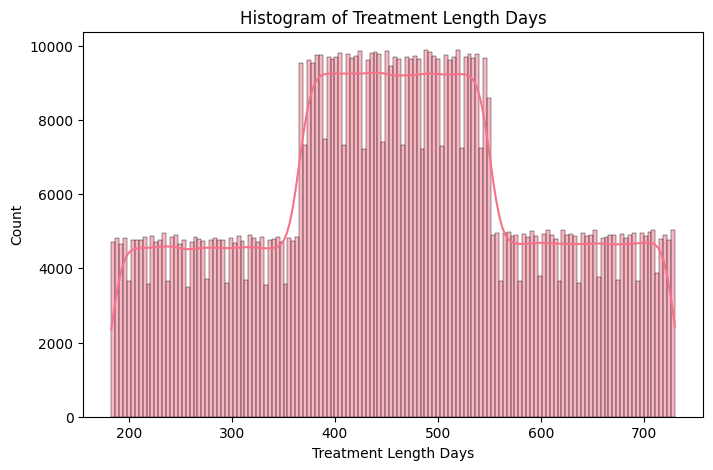

Saved -> Feature_Engineered.csv


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load data
df = pd.read_csv('Lung Cancer.csv')

# Feature Engineering
df_fe = df.copy()
df_fe['diagnosis_date'] = pd.to_datetime(df_fe['diagnosis_date'], errors='coerce')
df_fe['end_treatment_date'] = pd.to_datetime(df_fe['end_treatment_date'], errors='coerce')
df_fe['treatment_length_days'] = (df_fe['end_treatment_date'] - df_fe['diagnosis_date']).dt.days
if all(col in df_fe.columns for col in ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']):
    df_fe['comorbidity_count'] = df_fe['hypertension'] + df_fe['asthma'] + df_fe['cirrhosis'] + df_fe['other_cancer']
if 'smoking_status' in df_fe.columns:
    df_fe['ever_smoked'] = np.where(df_fe['smoking_status'].isin(['Current Smoker', 'Former Smoker']), 1, 0)
    df_fe['passive_exposure'] = np.where(df_fe['smoking_status'] == 'Passive Smoker', 1, 0)
df_fe['diagnosis_year'] = df_fe['diagnosis_date'].dt.year
df_fe['diagnosis_month'] = df_fe['diagnosis_date'].dt.month

# Visualization: Histogram of treatment_length_days
plt.figure(figsize=(8, 5))
sns.histplot(df_fe['treatment_length_days'].dropna(), kde=True)
plt.title('Histogram of Treatment Length Days')
plt.xlabel('Treatment Length Days')
plt.ylabel('Count')
plt.show()

# Drop unnecessary columns
drop_cols = ['id', 'diagnosis_date', 'end_treatment_date', 'country', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']
df_fe = df_fe.drop(columns=[col for col in drop_cols if col in df_fe.columns], errors='ignore')

# Save engineered data
df_fe.to_csv('Feature_Engineered.csv', index=False)
print("Saved -> Feature_Engineered.csv")

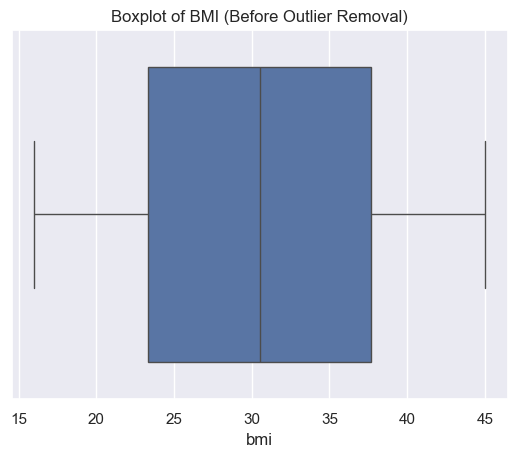

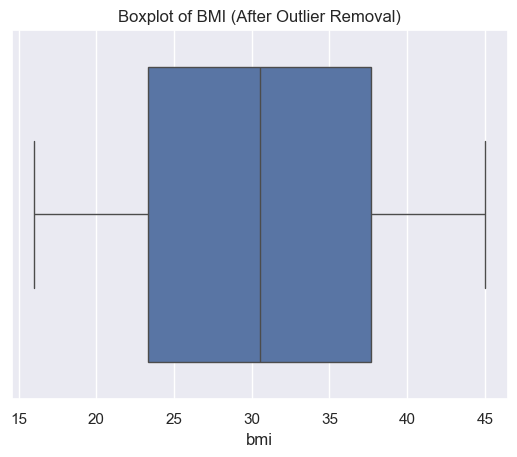

Saved -> Outlier_Removed.csv


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

# Load data
df = pd.read_csv('Lung Cancer.csv')

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Visualize before outlier removal
sns.boxplot(x=df['bmi'])
plt.title("Boxplot of BMI (Before Outlier Removal)")
plt.show()

# Apply outlier removal (example: bmi)
df_clean = df.copy()
for col in ['bmi']:  # Can extend to other numeric columns like 'age', 'cholesterol_level'
    df_clean = remove_outliers(df_clean, col)

# Visualize after outlier removal
sns.boxplot(x=df_clean['bmi'])
plt.title("Boxplot of BMI (After Outlier Removal)")
plt.show()

# Save cleaned data
df_clean.to_csv('Outlier_Removed.csv', index=False)
print("Saved -> Outlier_Removed.csv")

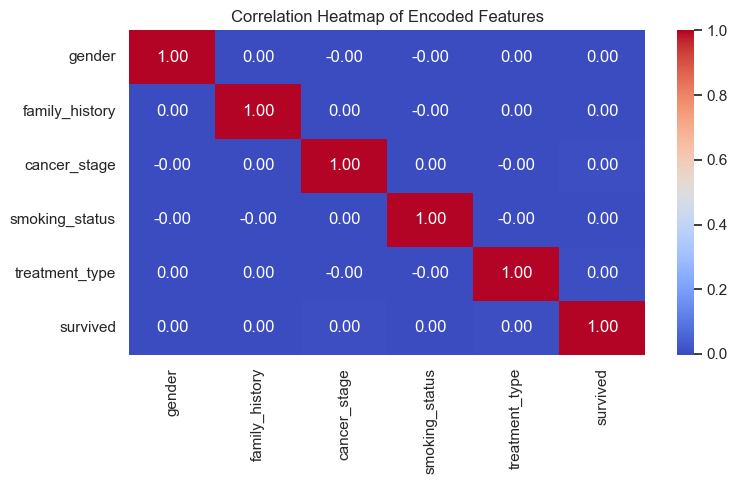

Saved -> EncodingAIML.csv


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('Lung Cancer.csv')

# Create a copy for encoding
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
cols_to_encode = ['gender', 'family_history', 'cancer_stage', 'smoking_status', 'treatment_type']
for col in cols_to_encode:
    if col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Correlation heatmap
selected_cols = cols_to_encode + ['survived']
encoded_df = df_encoded[selected_cols]
corr_matrix = encoded_df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Encoded Features")
plt.tight_layout()
plt.show()

# Drop unwanted columns
df_encoded = df_encoded.drop(['id', 'country', 'diagnosis_date', 'end_treatment_date'], axis=1, errors='ignore')

# Save encoded data
df_encoded.to_csv('EncodingAIML.csv', index=False)
print("Saved -> EncodingAIML.csv")

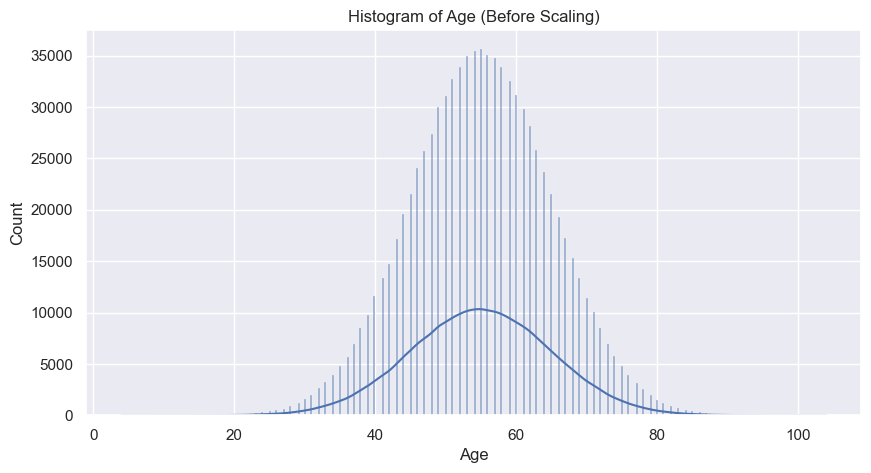

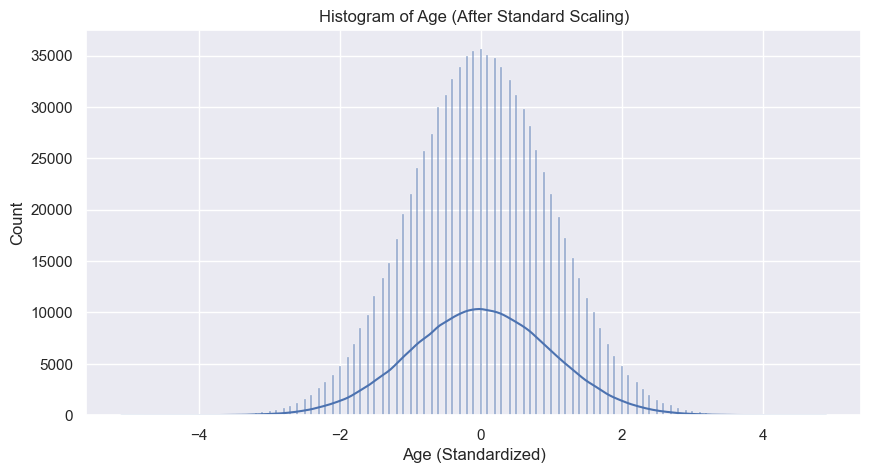

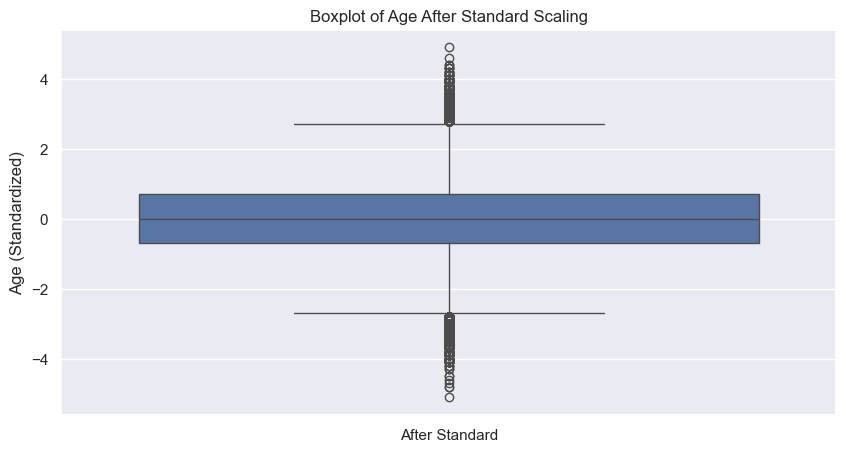

Saved -> Scaled_Data.csv


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('Lung Cancer.csv')

# Select numeric columns for scaling
numeric_cols = ['age', 'bmi', 'cholesterol_level']
df_scaled = df.copy()

# Standard Scaling
std_scaler = StandardScaler()
df_scaled[numeric_cols] = std_scaler.fit_transform(df_scaled[numeric_cols])

# Visualizations (example for 'age')
# Before scaling
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], kde=True)
plt.title('Histogram of Age (Before Scaling)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# After scaling
plt.figure(figsize=(10, 5))
sns.histplot(df_scaled['age'], kde=True)
plt.title('Histogram of Age (After Standard Scaling)')
plt.xlabel('Age (Standardized)')
plt.ylabel('Count')
plt.show()

# Boxplot after scaling
plt.figure(figsize=(10, 5))
sns.boxplot(data=[df_scaled['age']])
plt.xticks([0], ['After Standard'])
plt.title('Boxplot of Age After Standard Scaling')
plt.ylabel('Age (Standardized)')
plt.show()

# Save scaled data
df_scaled.to_csv('Scaled_Data.csv', index=False)
print("Saved -> Scaled_Data.csv")

In [ ]:
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import category_encoders as ce

# Load data
df = pd.read_csv('Lung Cancer.csv')

# Binary encoding for categoricals
binary_encoder = ce.BinaryEncoder(cols=['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type'])
df_encoded = binary_encoder.fit_transform(df)

# Numeric + encoded features
X = df_encoded.drop(columns=['id', 'diagnosis_date', 'end_treatment_date', 'survived'], errors='ignore')

# Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()]

# Visualize variances
variances = np.var(X, axis=0)
plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=variances)
plt.xticks(rotation=90)
plt.title('Feature Variances')
plt.ylabel('Variance')
plt.axhline(y=0.01, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Save reduced data
pd.DataFrame(X_reduced, columns=selected_features).to_csv('VarianceThreshold_Data.csv', index=False)
print("Saved -> VarianceThreshold_Data.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualization functions
def safe_hist(series, title, bins=30):
    plt.figure(figsize=(8, 5))
    s = pd.to_numeric(series, errors="coerce").dropna()
    if len(s) == 0:
        plt.title(f"{title} (no numeric)")
        plt.show()
        return
    plt.hist(s, bins=bins)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Count")
    plt.show()

def boxplot(series, title):
    plt.figure(figsize=(8, 5))
    data = pd.to_numeric(series, errors="coerce").dropna()
    if len(data) == 0:
        plt.title(f"{title} (no data)")
        plt.show()
        return
    plt.boxplot(data, showfliers=False)
    plt.title(title)
    plt.ylabel(series.name)
    plt.show()

# Load data
df = pd.read_csv('Lung Cancer.csv')
df = df.drop(columns=['id'], errors='ignore')
print("Loaded:", df.shape)

# Select numeric columns for PCA
num_all = [c for c in ['age', 'bmi', 'cholesterol_level'] if c in df.columns]
print("Numeric columns for PCA:", num_all)

# Visualize before PCA
for col in num_all:
    safe_hist(df[col], f"Histogram of {col} (Before PCA)")
    boxplot(df[col], f"Boxplot of {col} (Before PCA)")

# Apply PCA
k = min(5, len(num_all)) if len(num_all) else 0
if k == 0:
    print("No numeric columns for PCA.")
    X_pca = pd.DataFrame(index=df.index)
else:
    pca = PCA(n_components=k).fit(df[num_all].dropna())
    X_pca = pd.DataFrame(
        pca.transform(df[num_all].fillna(0)),
        columns=[f"pca_{i+1}" for i in range(k)],
        index=df.index
    )
    cum = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(cum)+1), cum, marker="o")
    plt.grid()
    plt.title("PCA Cumulative Explained Variance")
    plt.xlabel("Number of Components (k)")
    plt.ylabel("Cumulative Variance Ratio")
    plt.show()

# Visualize after PCA
if not X_pca.empty:
    for col in X_pca.columns:
        safe_hist(X_pca[col], f"Histogram of {col} (After PCA)")
        boxplot(X_pca[col], f"Boxplot of {col} (After PCA)")

# Save PCA features
X_pca.to_csv('pca_features.csv', index=False)
print("Saved -> pca_features.csv")

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler  # handling class imbalance by reducing
from collections import Counter

# Read the dataset
df = pd.read_csv("Lung Cancer.csv")  # change filename if needed
print("Original class distribution:", Counter(df['survived']))  # access target column

# Create target and features
y = df['survived']  # target vector
X = df.drop('survived', axis=1)  # create feature matrix by removing target

# Apply Random UnderSampling
rus = RandomUnderSampler(random_state=42)  # create undersampling object
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create balanced DataFrame
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
print("Balanced class distribution:", Counter(y_resampled))

# Save to CSV
df_balanced.to_csv("T124510004_Class_Imbalance.csv", index=False)  # prevent saving index as a column

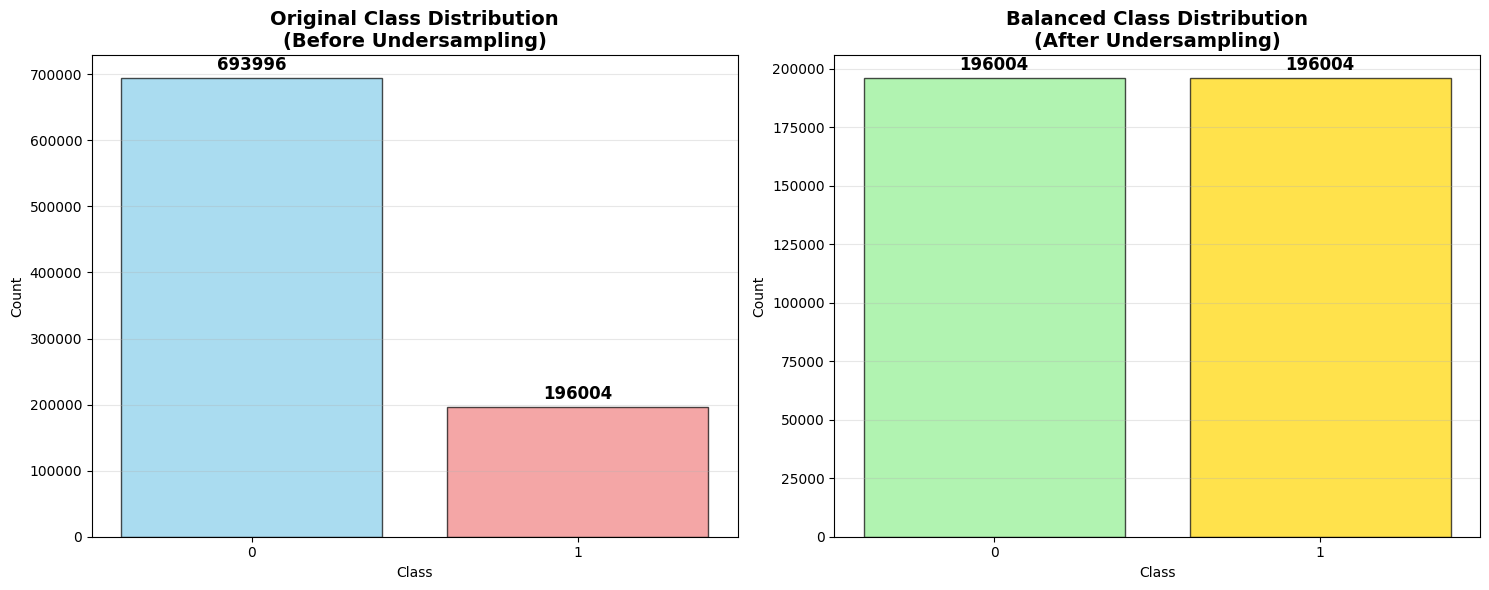

In [18]:
import matplotlib.pyplot as plt #ploting library
import seaborn as sns #matplotlib visualization
import numpy as np 
from collections import Counter #For counting class frequencies

# Set style for better visualizations
plt.style.use('default') #Use matplotlib's default style
sns.set_palette("husl") #use seaboarn

# Visualization 1: Class Distribution Comparison (Before vs After)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) #1raw 2columns

# Original distribution
original_counts = Counter(y) #y is original target variable
ax1.bar([str(k) for k in original_counts.keys()], original_counts.values(), 
        color=['skyblue', 'lightcoral'], alpha=0.7, edgecolor='black')
ax1.set_title('Original Class Distribution\n(Before Undersampling)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)
for i, (class_label, count) in enumerate(original_counts.items()):   #Loop through class-count pairs with index
    ax1.text(i, count + max(original_counts.values())*0.01, str(count), #The count number as text
             ha='center', va='bottom', fontweight='bold', fontsize=12) #Display exact count values on bars

# Balanced distribution
balanced_counts = Counter(y_resampled) #Display exact count values on bars
ax2.bar([str(k) for k in balanced_counts.keys()], balanced_counts.values(), 
        color=['lightgreen', 'gold'], alpha=0.7, edgecolor='black')
ax2.set_title('Balanced Class Distribution\n(After Undersampling)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')
ax2.grid(axis='y', alpha=0.3)
for i, (class_label, count) in enumerate(balanced_counts.items()):       #Add value labels to balanced distribution bars
    ax2.text(i, count + max(balanced_counts.values())*0.01, str(count), 
             ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

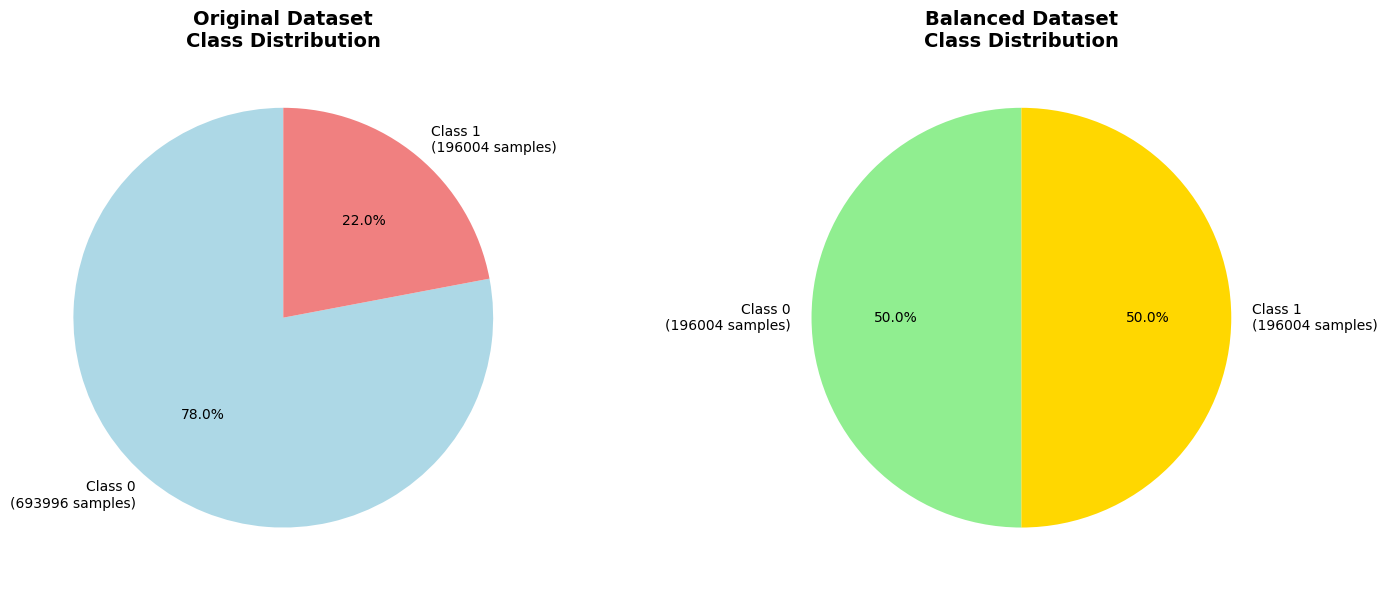

In [19]:
# Visualization 2: Pie Charts Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  #15 inches wide × 6 inches tall

# Original pie chart
ax1.pie(original_counts.values(),   #The class counts as pie slice sizes
        labels=[f'Class {idx}\n({count} samples)' for idx, count in original_counts.items()], #Create custom labels for each pie slice 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'],
        textprops={'fontsize': 10})
ax1.set_title('Original Dataset\nClass Distribution', fontsize=14, fontweight='bold')

# Balanced pie chart
ax2.pie(balanced_counts.values(), 
        labels=[f'Class {idx}\n({count} samples)' for idx, count in balanced_counts.items()], 
        autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'gold'],
        textprops={'fontsize': 10})   #Set font size to 10 for all text in the pie chart
ax2.set_title('Balanced Dataset\nClass Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

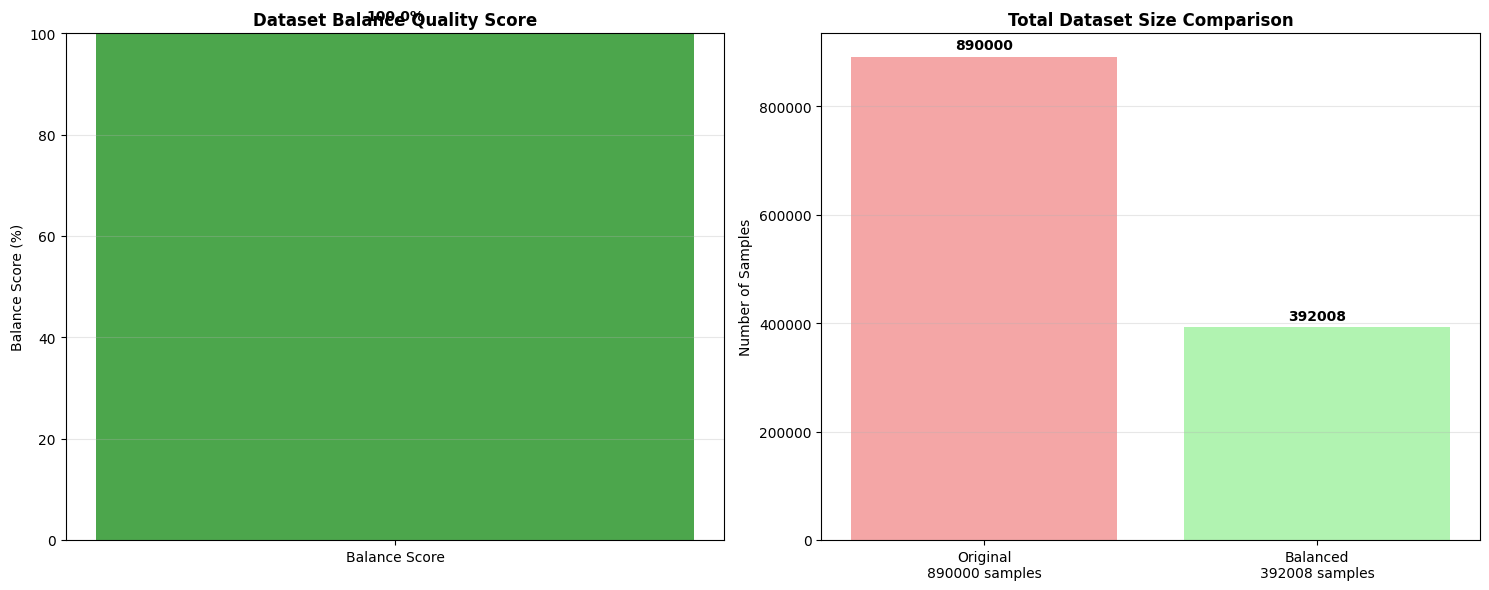

In [20]:
# Visualization 6: Balanced Dataset Quality Check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Balance quality metric   Calculate the balance quality score
balance_ratio = min(balanced_counts.values()) / max(balanced_counts.values())
balance_score = balance_ratio * 100

ax1.bar(['Balance Score'], [balance_score], color=['green' if balance_score > 95 else 'orange'], alpha=0.7)
ax1.set_ylim(0, 100)
ax1.set_ylabel('Balance Score (%)')
ax1.set_title('Dataset Balance Quality Score', fontweight='bold')
ax1.text(0, balance_score + 2, f'{balance_score:.1f}%', ha='center', va='bottom', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)   #Add horizontal grid lines

# Sample size comparison
sizes = [len(df), len(df_balanced)]    #List containing [original_size, balanced_size]
labels = [f'Original\n{sizes[0]} samples', f'Balanced\n{sizes[1]} samples']
ax2.bar(labels, sizes, color=['lightcoral', 'lightgreen'], alpha=0.7)
ax2.set_ylabel('Number of Samples')
ax2.set_title('Total Dataset Size Comparison', fontweight='bold')
for i, v in enumerate(sizes):   #Loop through sizes with index
    ax2.text(i, v + max(sizes)*0.01, f'{v}', ha='center', va='bottom', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()   #Finalize and display the plots
plt.show()

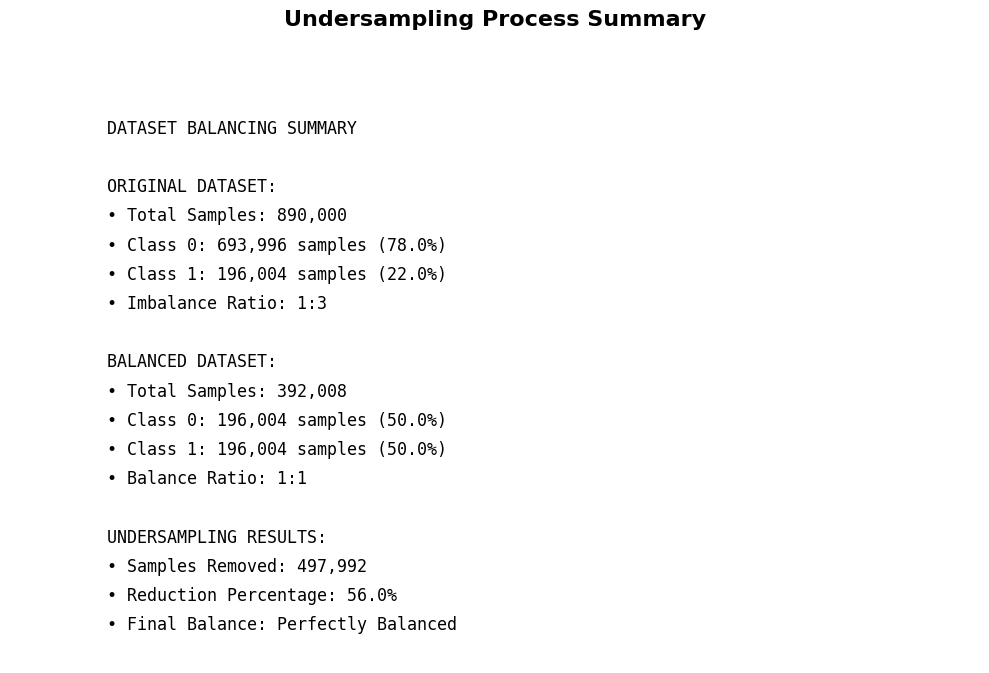

In [21]:
# Visualization 4: Dataset Statistics Summary
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  #Turn off the axes (no x/y axes, borders, or ticks)

# Allows multi-line string
summary_text = f"""   
DATASET BALANCING SUMMARY

ORIGINAL DATASET:
• Total Samples: {len(df):,}
• Class 0: {original_counts[0]:,} samples ({original_counts[0]/len(df)*100:.1f}%)  
• Class 1: {original_counts[1]:,} samples ({original_counts[1]/len(df)*100:.1f}%)
• Imbalance Ratio: 1:{original_counts[0]//original_counts[1]}

BALANCED DATASET:
• Total Samples: {len(df_balanced):,}
• Class 0: {balanced_counts[0]:,} samples ({balanced_counts[0]/len(df_balanced)*100:.1f}%)
• Class 1: {balanced_counts[1]:,} samples ({balanced_counts[1]/len(df_balanced)*100:.1f}%)
• Balance Ratio: 1:{balanced_counts[0]//balanced_counts[1]}

UNDERSAMPLING RESULTS:
• Samples Removed: {len(df) - len(df_balanced):,}
• Reduction Percentage: {(1 - len(df_balanced)/len(df))*100:.1f}%
• Final Balance: {'Perfectly Balanced' if balanced_counts[0] == balanced_counts[1] else 'Well Balanced'}
"""

ax.text(0.1, 0.9, summary_text, fontsize=12, fontfamily='monospace',
        verticalalignment='top', linespacing=1.8, fontweight='normal')
ax.set_title('Undersampling Process Summary', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

In [22]:
df_encoded.to_csv("FinalDataSet.csv", index=False)
print("File saved as 'FinalDataSet.csv'")

PermissionError: [Errno 13] Permission denied: 'FinalDataSet.csv'